# Assignment 4
Welcome to Assignment 4. This will be the most fun. Now we will prepare data for plotting.

Just make sure you hit the play button on each cell from top to down. There are three functions you have to implement. Please also make sure than on each change on a function you hit the play button again on the corresponding cell to make it available to the rest of this notebook.

This notebook is designed to run in a IBM Watson Studio default runtime (NOT the Watson Studio Apache Spark Runtime as the default runtime with 1 vCPU is free of charge). Therefore, we install Apache Spark in local mode for test purposes only. Please don't use it in production.

In case you are facing issues, please read the following two documents first:
https://github.com/IBM/skillsnetwork/wiki/Environment-Setup
https://github.com/IBM/skillsnetwork/wiki/FAQ

Then, please feel free to ask:
https://coursera.org/learn/machine-learning-big-data-apache-spark/discussions/all
Please make sure to follow the guidelines before asking a question:

https://github.com/IBM/skillsnetwork/wiki/FAQ#im-feeling-lost-and-confused-please-help-me
If running outside Watson Studio, this should work as well. In case you are running in an Apache Spark context outside Watson Studio, please remove the Apache Spark setup in the first notebook cells.

In [1]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:orange">'+string+'</span>'))

if('sc' in locals() or 'sc' in globals()):
    printmd('Error: This Watson studio is Apache mode. Please change it to default mode')
else:
    printmd('All is good to go.')

# <span style="color:orange">All is good to go.</span>

In [2]:
!pip install pyspark==2.4.5

In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [6]:
def getSample():
    df = spark.sql("SELECT * FROM washing")
    return df.rdd.sample(False,0.1)

Now we want to create a histogram and boxplot. Please ignore the sampling for now and return a python list containing all temperature values from the data set

In [5]:
def getListForHistogramAndBoxPlot():
    my_list = spark.sql("""
        SELECT temperature from washing where temperature is not null
    """).rdd.map(lambda row: row.temperature).collect()
    if not type(my_list)==list:
        raise Exception('return type not a list')
    return my_list

Finally we want to create a run chart. Please return two lists (encapsulated in a python tuple object) containing temperature and timestamp (ts) ordered by timestamp. Please refer to the following link to learn more about tuples in python: https://www.tutorialspoint.com/python/python_tuples.htm

In [19]:
def getListsForRunChart():
    double_tuple_rdd = spark.sql("""
        select temperature, ts from washing where temperature is not null order by ts asc
    """).rdd.sample(False,0.1).map(lambda row: (row.ts, row.temperature))
    result_array_ts = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[0]).collect()
    result_array_temperature = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[1]).collect()
    return (result_array_ts,result_array_temperature)

Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database.

In [8]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-12-20 18:54:33--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-12-20 18:54:33--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-12-20 18:54:33--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [9]:
df = spark.read.parquet("washing.parquet")
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

Now we gonna test the functions you've completed and visualize the data.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

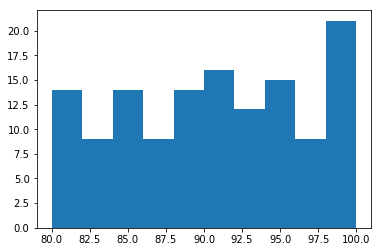

In [12]:
plt.hist(getListForHistogramAndBoxPlot())
plt.show()

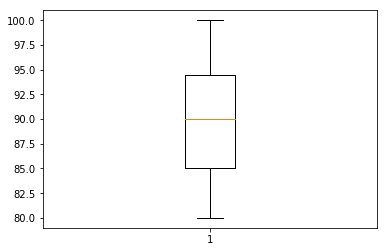

In [13]:
plt.boxplot(getListForHistogramAndBoxPlot())
plt.show()

In [20]:
lists = getListsForRunChart()

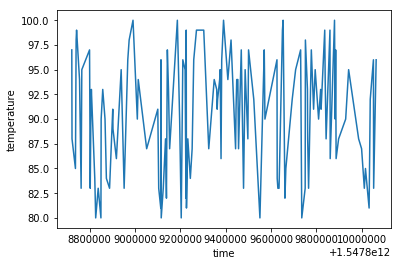

In [21]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

In [22]:
!rm -f rklib.py
!wget https://raw.githubusercontent.com/IBM/coursera/master/rklib.py

--2020-12-20 19:03:56--  https://raw.githubusercontent.com/IBM/coursera/master/rklib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540 (2.5K) [text/plain]
Saving to: ‘rklib.py’

100%[======================================>] 2,540       --.-K/s   in 0s      

2020-12-20 19:03:56 (16.8 MB/s) - ‘rklib.py’ saved [2540/2540]



In [23]:
from rklib import submitAll
import json

key = "S5PNoSHNEeisnA6YLL5C0g"
email = "jonah.winninghoff@gmail.com"
token = "bFSSlM1xDaVLyuNo"

In [24]:
parts_data = {}
parts_data["iLdHs"] = json.dumps(str(type(getListForHistogramAndBoxPlot())))
parts_data["xucEM"] = json.dumps(len(getListForHistogramAndBoxPlot()))
parts_data["IyH7U"] = json.dumps(str(type(getListsForRunChart())))
parts_data["MsMHO"] = json.dumps(len(getListsForRunChart()[0]))

submitAll(email, token, key, parts_data)

Submission successful, please check on the coursera grader page for the status
-------------------------
{"elements":[{"itemId":"95cS6","id":"sUpST4RAEeawAApvKZgcCQ~95cS6~YL2f3kL2EeuQ8g5IurdP7w","courseId":"sUpST4RAEeawAApvKZgcCQ"}],"paging":{},"linked":{}}
-------------------------
